## The most Nobel of Prizes

<p>The Nobel Foundation has made a dataset available of all prize winners from the start of the prize, in 1901, to 2016. Let's load it in and take a look.</p>

In [101]:
# Loading in required libraries
import pandas as pd
import seaborn as sns
import numpy as np

# Reading in the Nobel Prize data
nobel = pd.read_csv("nobel.csv")

# Taking a look at the first several winners
nobel.head(n=6)

,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,Birth Country,Sex,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",01-Jan,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,01/03/1911,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",01-Jan,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,07/09/1907,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",01-Jan,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,31/03/1917,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,01-Feb,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,30/10/1910,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,01-Feb,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,12/06/1912,Paris,France
5,1901,Physics,The Nobel Prize in Physics 1901,"""in recognition of the extraordinary services ...",01-Jan,1,Individual,Wilhelm Conrad Röntgen,1845-03-27,Lennep (Remscheid),Prussia (Germany),Male,Munich University,Munich,Germany,10/02/1923,Munich,Germany


## So, who gets the Nobel Prize?
<p>Looking at all winners in the dataset, from 1901 to 2016, which sex and which country is the most commonly represented? </p>

In [100]:
# Display the number of (possibly shared) Nobel Prizes handed
# out between 1901 and 2016
display(len(nobel))

# Display the number of prizes won by male and female recipients.
display(nobel["Sex"].value_counts())

# Display the number of prizes won by the top 10 nationalities.
nobel["Birth Country"].value_counts().head(10)

938

Male      888
Female     50
Name: Sex, dtype: int64

United States of America    273
United Kingdom               88
Germany                      70
France                       53
Sweden                       30
Japan                        29
Russia                       20
Netherlands                  19
Italy                        18
Canada                       18
Name: Birth Country, dtype: int64

## Country dominance and timeline
<p>Not so surprising perhaps: the most common Nobel laureate between 1901 and 2016 was a man born in the United States of America. But in 1901 all the winners were European. When did the USA start to dominate the Nobel Prize charts?</p>

In [97]:
# Calculating the proportion of USA born winners per decade
nobel['usa_born_winner'] = nobel["Birth Country"] == "United States of America"
nobel['decade'] = (np.floor(nobel["Year"] / 10) * 10).astype(int)
prop_usa_winners = nobel.groupby("decade", as_index=False)["usa_born_winner"].mean()

# Display the proportions of USA born winners per decade
prop_usa_winners

,decade,usa_born_winner
0,1900,0.017544
1,1910,0.078947
2,1920,0.074074
3,1930,0.245902
4,1940,0.309524
5,1950,0.282051
6,1960,0.280000
7,1970,0.311321
8,1980,0.322917
9,1990,0.403846


## Country dominance, visualized
<p>A table is OK, but to <em>see</em> when the USA started to dominate the Nobel charts we need a plot!</p>

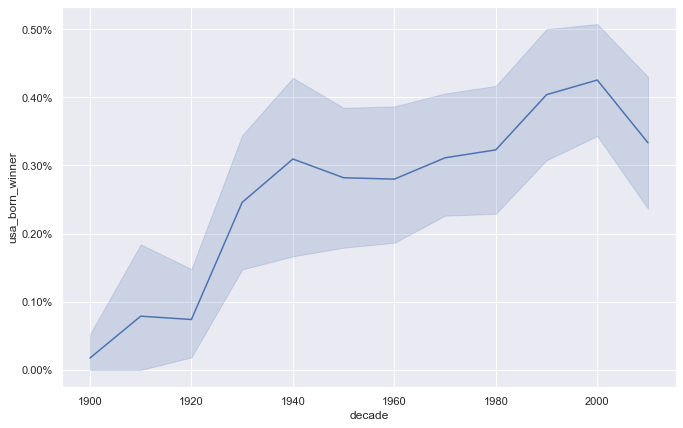

In [99]:
# Setting the plotting theme
sns.set()
# and setting the size of all plots.
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [11, 7]

# Plotting USA born winners 
ax = sns.lineplot(x=nobel["decade"], y=nobel["usa_born_winner"])

# Adding %-formatting to the y-axis
from matplotlib.ticker import PercentFormatter
ax.yaxis.set_major_formatter(PercentFormatter())

## What is the gender of a typical Nobel Prize winner?
<p>So the USA became the dominating winner of the Nobel Prize first in the 1930s and had kept the leading position ever since. But one group that was in the lead from the start, and never seems to let go, are <em>men</em>. Maybe it shouldn't come as a shock that there is some imbalance between how many male and female prize winners there are, but how significant is this imbalance? And is it better or worse within specific prize categories like physics, medicine, literature, etc.?</p>

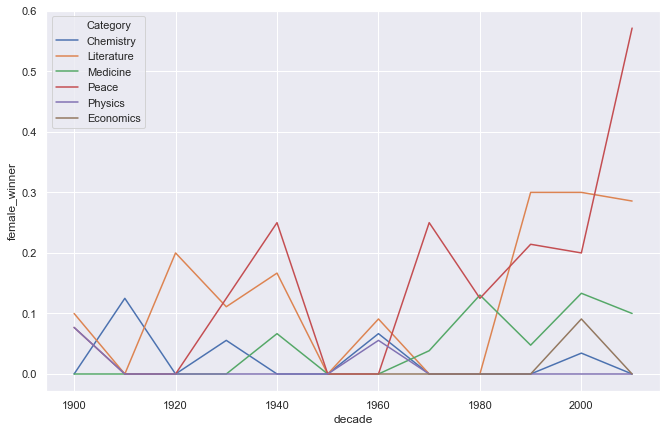

In [98]:
# Calculating the proportion of female laureates per decade
nobel['female_winner'] = nobel["Sex"] == "Female"
prop_female_winners = nobel.groupby(["decade", "Category"], as_index=False)["female_winner"].mean()

# Plotting USA born winners with % winners on the y-axis
ax = sns.lineplot(x="decade", y="female_winner", hue="Category", data=prop_female_winners)

## The first woman to win the Nobel Prize
<p>The plot above is a bit messy as the lines are overplotting. But it does show some interesting trends and patterns. Overall the imbalance is pretty large with physics, economics, and chemistry having the largest imbalance. Medicine has a somewhat positive trend, and since the 1990s the literature prize is also now more balanced. The big outlier is the peace prize during the 2010s, but keep in mind that this just covers the years 2010 to 2016.</p>
<p>Given this imbalance, who was the first woman to receive a Nobel Prize? And in what category?</p>

In [103]:
# Picking out the first woman to win a Nobel Prize
df1 = nobel[nobel["Sex"] == "Female"]
df1.nsmallest(1, "Year")

,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,Birth Country,Sex,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country
19,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",01-Apr,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,Russian Empire (Poland),Female,NaN,NaN,NaN,04/07/1934,Sallanches,France


## Repeat laureates
<p>For most scientists/writers/activists a Nobel Prize would be the crowning achievement of a long career. But for some people, one is just not enough, and few have gotten it more than once. Who are these lucky few? (Having won no Nobel Prize myself, I'll assume it's just about luck.)</p>

In [102]:
# Selecting the laureates that have received 2 or more prizes.
nobel.groupby("Full Name").filter(lambda x: len(x) >= 2)

,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,Birth Country,Sex,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country
19,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",01-Apr,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,Russian Empire (Poland),Female,NaN,NaN,NaN,04/07/1934,Sallanches,France
46,1908,Medicine,The Nobel Prize in Physiology or Medicine 1908,"""in recognition of their work on immunity""",01-Feb,302,Individual,Paul Ehrlich,1854-03-14,Strehlen (Strzelin),Prussia (Poland),Male,Goettingen University,Göttingen,Germany,20/08/1915,Bad Homburg vor der Höhe,Germany
47,1908,Medicine,The Nobel Prize in Physiology or Medicine 1908,"""in recognition of their work on immunity""",01-Feb,302,Individual,Paul Ehrlich,1854-03-14,Strehlen (Strzelin),Prussia (Poland),Male,Königliches Institut für experimentelle Therap...,Frankfurt-on-the-Main,Germany,20/08/1915,Bad Homburg vor der Höhe,Germany
63,1911,Chemistry,The Nobel Prize in Chemistry 1911,"""in recognition of her services to the advance...",01-Jan,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,Russian Empire (Poland),Female,Sorbonne University,Paris,France,04/07/1934,Sallanches,France
90,1917,Peace,The Nobel Peace Prize 1917,NaN,01-Jan,482,Organization,Comité international de la Croix Rouge (Intern...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
157,1931,Chemistry,The Nobel Prize in Chemistry 1931,"""in recognition of their contributions to the ...",01-Feb,189,Individual,Carl Bosch,1874-08-27,Cologne,Germany,Male,University of Heidelberg,Heidelberg,Germany,26/04/1940,Heidelberg,Germany
158,1931,Chemistry,The Nobel Prize in Chemistry 1931,"""in recognition of their contributions to the ...",01-Feb,189,Individual,Carl Bosch,1874-08-27,Cologne,Germany,Male,I.G. Farbenindustrie A.G.,Heidelberg,Germany,26/04/1940,Heidelberg,Germany
159,1931,Chemistry,The Nobel Prize in Chemistry 1931,"""in recognition of their contributions to the ...",01-Feb,190,Individual,Friedrich Bergius,1884-10-11,"Goldschmieden, near Breslau",Germany (Poland),Male,University of Heidelberg,Heidelberg,Germany,30/03/1949,Buenos Aires,Argentina
160,1931,Chemistry,The Nobel Prize in Chemistry 1931,"""in recognition of their contributions to the ...",01-Feb,190,Individual,Friedrich Bergius,1884-10-11,"Goldschmieden, near Breslau",Germany (Poland),Male,I.G. Farbenindustrie A.G.,Mannheim-Rheinau,Germany,30/03/1949,Buenos Aires,Argentina
179,1934,Medicine,The Nobel Prize in Physiology or Medicine 1934,"""for their discoveries concerning liver therap...",01-Mar,328,Individual,William Parry Murphy,1892-02-06,"Stoughton, WI",United States of America,Male,Harvard University,"Cambridge, MA",United States of America,09/10/1987,"Brookline, MA",United States of America


## How old are you when you get the prize?
<p>The list of repeat winners contains some illustrious names! We again meet Marie Curie, who got the prize in physics for discovering radiation and in chemistry for isolating radium and polonium. John Bardeen got it twice in physics for transistors and superconductivity, Frederick Sanger got it twice in chemistry, and Linus Carl Pauling got it first in chemistry and later in peace for his work in promoting nuclear disarmament. We also learn that organizations also get the prize as both the Red Cross and the UNHCR have gotten it twice.</p>
<p>But how old are you generally when you get the prize?</p>

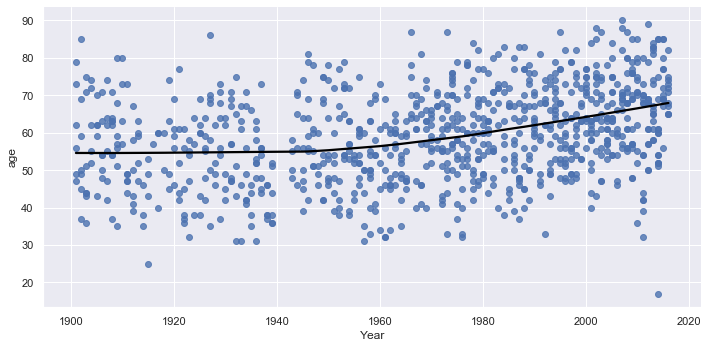

In [105]:
# Converting birth_date from String to datetime
nobel['Birth Date'] = pd.to_datetime(nobel['Birth Date'], format='%Y-%m-%d')
# Calculating the age of Nobel Prize winners
nobel['age'] = nobel["Year"] - nobel["Birth Date"].dt.year

# Plotting the age of Nobel Prize winners
sns.lmplot(x="Year", y="age", data=nobel, lowess=True, aspect=2, line_kws={"color" : "black"})

## Age differences between prize categories
<p>The plot above shows us a lot! We see that people use to be around 55 when they received the price, but nowadays the average is closer to 65. But there is a large spread in the laureates' ages, and while most are 50+, some are very young.</p>
<p>We also see that the density of points is much high nowadays than in the early 1900s -- nowadays many more of the prizes are shared, and so there are many more winners. We also see that there was a disruption in awarded prizes around the Second World War (1939 - 1945). </p>
<p>Let's look at age trends within different prize categories.</p>

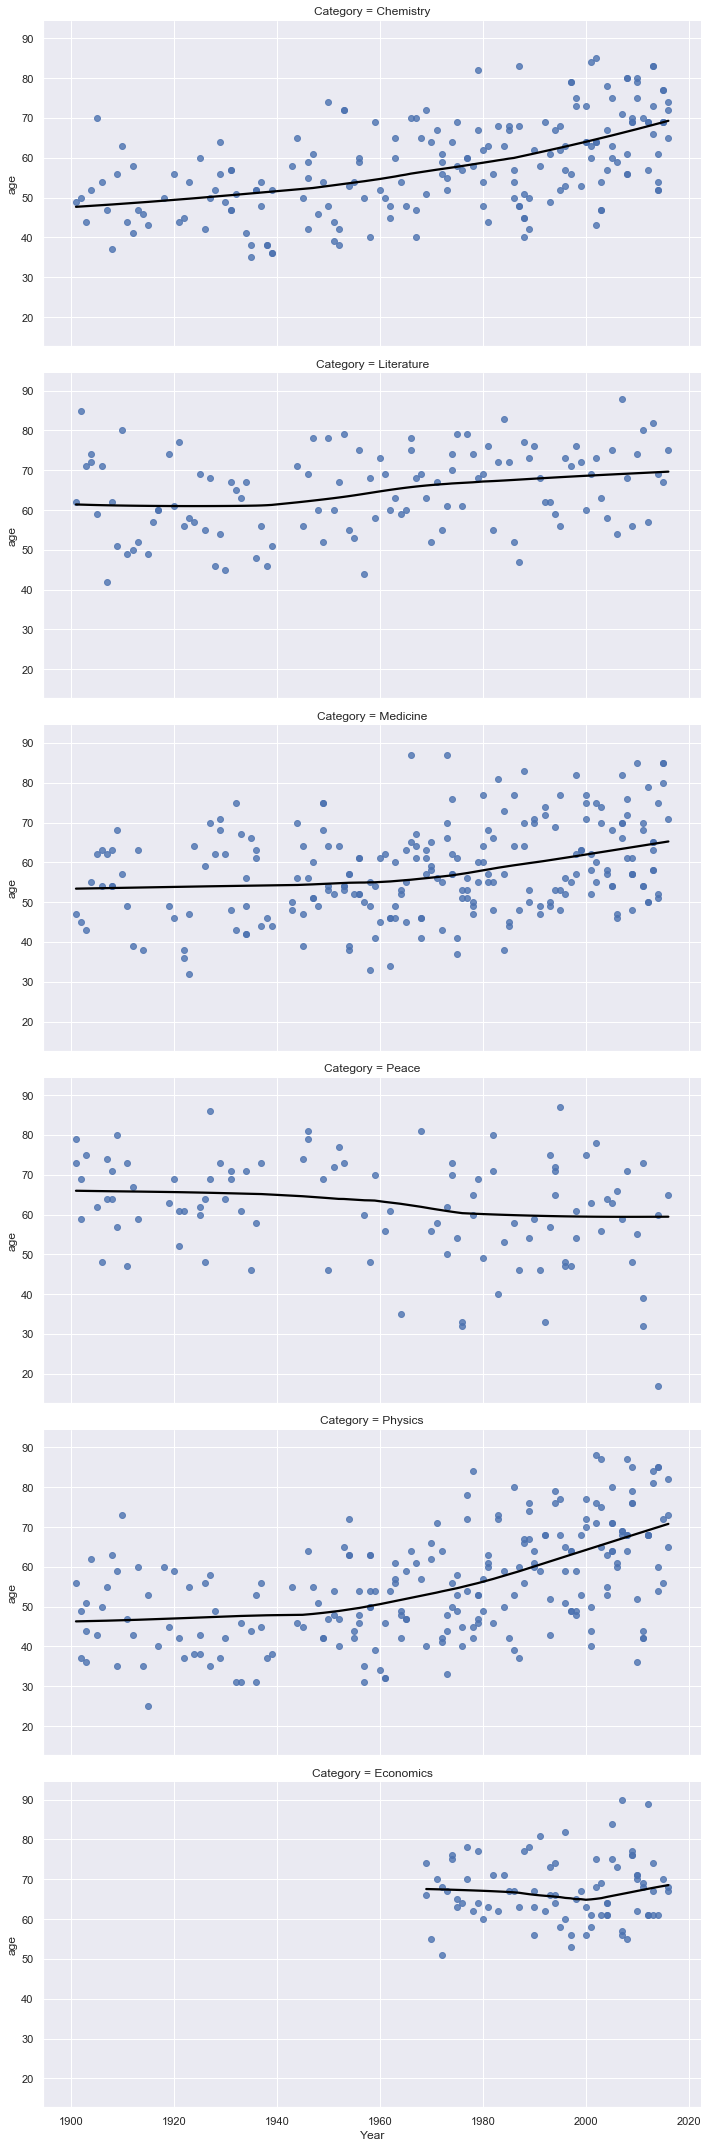

In [106]:
# Same plot as above, but separate plots for each type of Nobel Prize
sns.lmplot(x="Year", y="age", data=nobel, row="Category", lowess=True, aspect=2, line_kws={"color" : "black"})

## Oldest and youngest winners
<p>More plots with lots of exciting stuff going on! We see that both winners of the chemistry, medicine, and physics prize have gotten older over time. The trend is strongest for physics: the average age used to be below 50, and now it's almost 70. Literature and economics are more stable. We also see that economics is a newer category. But peace shows an opposite trend where winners are getting younger! </p>
<p>In the peace category we also a winner around 2010 that seems exceptionally young. This begs the questions, who are the oldest and youngest people ever to have won a Nobel Prize?</p>

In [107]:
# The oldest winner of a Nobel Prize as of 2016
display(nobel.nlargest(1, "age"))

# The youngest winner of a Nobel Prize as of 2016
nobel.nsmallest(1, "age")

,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,Birth Country,Sex,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country,age
822,2007,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for having laid the foundations of mechanism ...",01-Mar,820,Individual,Leonid Hurwicz,1917-08-21,Moscow,Russia,Male,University of Minnesota,"Minneapolis, MN",United States of America,24/06/2008,"Minneapolis, MN",United States of America,90.0


,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,Birth Country,Sex,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country,age
937,2014,Peace,The Nobel Peace Prize 2014,"""for their struggle against the suppression of...",01-Feb,914,Individual,Malala Yousafzai,1997-07-12,Mingora,Pakistan,Female,NaN,NaN,NaN,NaN,NaN,NaN,17.0
